# Proyecto Módulo 1: Consumo de energía eléctrica en México

### Integrantes
> - Navarro Martínez Jaime Isaac
> - Soto Bonilla Oscar Eduardo 

### Objetivo principal: Análisis y predicción de consumo de energía en México

El objetivo general de este proyecto es analizar datos estadísticos  sobre el consumo de energía eléctrica durante los últimos años en México y con la ayuda de un modelo matemático se realiza un curva de tendencia que prediga el posible consumo de energía eléctrica en los próximos años.

### Objetivo secundarios
+ Utilizar curvas de ajuste para extrapolar y predecir información a partir de un conjunto de datos específicos
+ Demostrar la efectividad de la programación en Python para resolver problemas matemáticos en el ámbito científico y económico
+ Realizar una breve retrospectiva sobre el consumo de energía eléctrica en el país y las tendencias de consumo que se han visto reforzadas en los últimos años.


## Librerias de Python

In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import pandas as pd

**Sympy:** Librería para el cálculo simbólico. Proporciona capacidades de álgebra informática como una aplicación independiente. Está escrito completamente en Python con pocas dependencias, por lo que es fácil de utilizar con otras librerías.

**Numpy:** Librería con soporte para arreglos multidimensionales y matrices de gran tamaño, junto con una gran colección de funciones matemáticas de alto nivel para operar este tipo de datos.

**Matplotlib:** Librería complemento de Numpy. Proporciona una API para generar y trazar gráficos en aplicaciones.

**Scipy:** Librería con propósitos de cómputo científico y técnico. Contiene módulos para optimización, integración, interpolación, funciones especiales, álgebra lineal, procesamiento de señales e imágenes, solucionador de ecuaciones diferenciales y otras tareas comunes en ciencia e ingeniería.

**Pandas:** Librería para manipulación y análisis de datos. Ofrece estructuras de datos y operaciones para manipular tablas numéricas, series de tiempo y permitir la lectura de archivos.

## Datos, información y modelo propuesto

El consumo de energía total aumenta en todo el mundo de forma paralela al desarrollo de la civilización. El nivel actual de uso de energía per cápita (kW-h per cápita) en los países en desarrollo podría ser suficiente para apoyar la creación de una infraestructura industrial y un nivel de vida que abarque el nivel de vida que se encuentra actualmente en los países en desarrollo.

*The World Bank* cuenta con uno de los bancos de datos más importantes en la actualidad; en el se encuentran registros sobre el consumo de energía eléctrica a nivel mundial.

Los datos de consumo de energía eléctrica se encuentran en un grafico de dispersión para el periodo de tiempo de 1971 a 2014 contras el conumo de kWh per cápita anual a nivel mundial. Se propone como modelo encontrar la recta que mejor se ajuste a la serie de puntos de los graficos de dispersión. Las curvas serviran como asistencia visual para los datos, con ella se buscará extrapolar e inferir el consumo esperado en años proximos y la relación de crecimiento del consumo anual.

El documento **Comp Mexico_World.xlsx** contiene información rescatadad de *The World Bank* sobre el consumo energía eléctrica (kWh per cápita) para realizar el modelo.

## Solución del problema planteado 

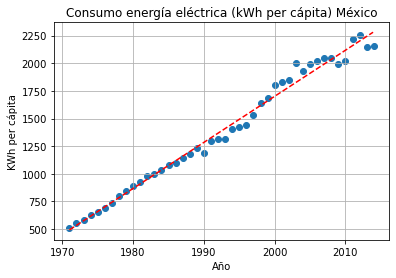

In [16]:
# Definimos una variable y una función para adaptar los datos]
sym.var('x')
def objective(x, a, b):
    return a + b*x

# Utilizamos Pandas para tomar el archivo de excel
df = pd.read_excel('Comp Mexico_World.xlsx')
data = df.values
x1, y1 = data[:,0], data[:,1]

# Ajuste de curva
popt, _ = opt.curve_fit(objective, x1, y1)

# Variables parametro de la curva
a, b = popt

# Definimos una secuencia de inputs de los mas pequeños a los mas grandes
x1_line = np.arange(min(x1), max(x1), .1)

# Calculo de la salidad de datos para el rango
y1_line = objective(x1_line, a, b)

# Personalizacion y trazado de gráfica
fig, ax = plt.subplots()
ax.set_xlabel('Año', loc='center')
ax.set_ylabel('KWh per cápita', loc='center')
plt.scatter(x1, y1)
plt.plot(x1_line, y1_line, '--', color='red')
plt.title('Consumo energía eléctrica (kWh per cápita) México')
plt.grid()


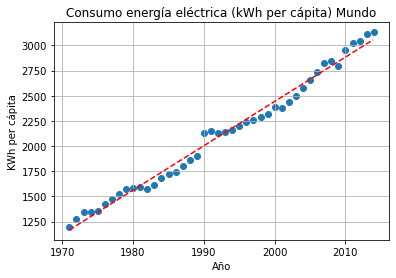

In [14]:
x2, y2 = data[:,0], data[:,2]

# Ajuste de curva
popt, _ = opt.curve_fit(objective, x2, y2)

# Variables parametro de la curva
a, b = popt

# Definimos una secuencia de inputs de los mas pequeños a los mas grandes
x2_line = np.arange(min(x2), max(x2), .1)

# Calculo de la salidad de datos para el rango
y2_line = objective(x2_line, a, b)

# Graficar
fig, ax = plt.subplots()
ax.set_xlabel('Año', loc='center')
ax.set_ylabel('KWh per cápita', loc='center')
plt.scatter(x2, y2)
plt.plot(x2_line, y2_line, '--', color='red')
plt.title('Consumo energía eléctrica (kWh per cápita) Mundo')
plt.grid()

## Visualización de la solución

Despues de obtener la curva de ajuste deseada para los dos conjuntos de datos se procede a realizar la comparación entre ambas.

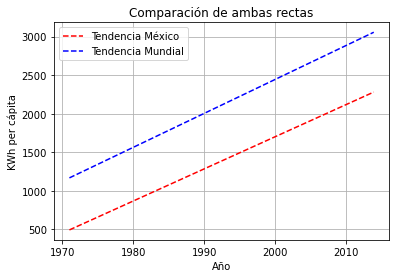

In [13]:
fig, ax = plt.subplots()
ax.set_xlabel('Año', loc='center')
ax.set_ylabel('KWh per cápita', loc='center')
plt.plot(x1_line, y1_line, '--', color='red', label='Tendencia México')
plt.plot(x2_line, y2_line, '--', color='blue', label='Tendencia Mundial')
plt.legend(loc='best')
plt.title('Comparación de ambas rectas')
plt.grid()

Podemos observar la misma tendencia de crecimiento tanto a nivel mundial como a nivel nacional. El cambio en México y a nivel mundial muestran un crecimiento sustentado durante varios años, por lo que es seguro asumir un aumento en el consumo de energía en años subsecuentes. Las rectas aparentan ser paralelas, la tendencia mundial, en líneas generales, muestra un mayor consumo mientras que México tiene un consumo menor per cápita.

Se puede asumir que en años subsecuentes al 2021 se consuma más de 2500 kWh per cápita anualmente, y a nivel mundial se esperaría un consumo mayor a 3500 kWh per cápita anual.

## Conclusiones
Utilizando un método de ajuste de curvas fue posible encontrar una línea de tendencia que se ajustase mejor a los dos conjuntos de datos del problema planteado. Gracias a esto, se pudo identificar visualmente, y con bastante facilidad, el crecimiento de consumo energético de los últimos años. Las librerias de SciPy, NumPy y Pandas demostraron ser excelentes herramientas para manejar esta clase de problemas y datos numéricos. Utilizando un par de funciones propias de dichas librerías se facilito bastante la resolución del problema.


Es notoria la relación entre el avance y desarrollo industrial a nivel mundial y el aumento de consumo de energía eléctrica. La producción y el uso de dispositivos electrónicos, el tráfico de datos y el almacenamiento está creciendo cada año y se espera que siga creciendo en 2021. El tráfico de Internet se está expandiendo cada año, lo que significa que la cantidad de centros de datos se está expandiendo muy rápidamente, aumentando el consumo de energía de manera espectacular. 

## Referencias

*Electric power consumption (kwh per capita). (n.d.). Retrieved February 22, 2021, from https://data.worldbank.org/indicator/EG.USE.ELEC.KH.PC?view=chart*